# Bengaluru Apartments Analysis

### AIM
###### Understanding and developing a regression model for the house prices of various types of settlements in and around Bangaluru City based on the current real estate value (in rupees) and size (in sq. ft)

## Import relevant libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Read the data

In [3]:
raw_data=pd.read_csv('blore_apartment_data.csv')

In [4]:
raw_data

,names,Price,Area,Unit Type
0,Salarpuria Sattva Cadenza,39 L -41.65 L,755 sq.ft,1 BHK Apartment
1,Salarpuria Sattva Cadenza,55 L -75 L,1175-1275 sq.ft,2 BHK Apartment
2,Salarpuria Sattva Cadenza,70.04 L -73.30 L,1335-1340 sq.ft,2.5 BHK Apartment
3,Salarpuria Sattva Cadenza,65 L -95 L,1365-1595 sq.ft,3 BHK Apartment
4,Purva Skydale,76.25 L -1.75 Cr,1273-1371 sq.ft,2 BHK Apartment
...,...,...,...,...
2655,Sobha Onyx,1.12 Cr -1.60 Cr,1822-1946 sq.ft,3 BHK Apartment
2656,Sobha Onyx,1.64 Cr,2612 sq.ft,3 BHK PentHouse
2657,Sobha Onyx,2.31 Cr,3670 sq.ft,4 BHK PentHouse
2658,Aban Desire,59.98 L -72.33 L,954-1162 sq.ft,2 BHK Apartment


## Check for NULL values

In [5]:
raw_data.isnull().sum()

names          0
Price        112
Area         160
Unit Type      0
dtype: int64

In [6]:
data=raw_data.copy()

## Drop all null value rows

In [7]:
data=data.dropna(axis=0)

In [8]:
data.isnull().sum()

names        0
Price        0
Area         0
Unit Type    0
dtype: int64

## Check Price data to get an average estimate for each entry

In [9]:
PriceList=list(data['Price'])
PriceList

['39 L -41.65 L',
 '55 L -75 L',
 '70.04 L -73.30 L',
 '65 L -95 L',
 '76.25 L -1.75 Cr',
 '93 L -1.58 Cr',
 '41.76 L -54 L',
 '69.20 L -1.21 Cr',
 '75 L -1.43 Cr',
 '56.64 L -80.06 L',
 '67 L -80.06 L',
 '70.56 L -1.10 Cr',
 '29.84 L -39.47 L',
 '54.26 L -77.49 L',
 '65.84 L -98.65 L',
 '33 L',
 '46 L -77 L',
 '70 L -91 L',
 '38.14 L -75 L',
 '59 L -66 L',
 '55.08 L -72.68 L',
 '34.75 L -52 L',
 '48 L -65 L',
 '56.90 L -90 L',
 '8.98 L -1.08 Cr',
 '19.55 L -20.82 L',
 '24.85 L -32.02 L',
 '34.27 L -40.97 L',
 '1.15 Cr -1.83 Cr',
 '1.44 Cr -2.35 Cr',
 '48 L -84 L',
 '73.59 L -86.79 L',
 '35 L -46.87 L',
 '61.52 L -95 L',
 '83.97 L -1.37 Cr',
 '89.02 L',
 '78 L -1.39 Cr',
 '59.66 L -71.67 L',
 '87.22 L -1.09 Cr',
 '62 L -1.26 Cr',
 '1.04 Cr -1.63 Cr',
 '65.81 L -1.16 Cr',
 '1.07 Cr -1.10 Cr',
 '90 L -2.07 Cr',
 '2 Cr -2.65 Cr',
 '27.88 L -40.22 L',
 '45.76 L -75 L',
 '72.95 L -73 L',
 '64.79 L -9.93 Cr',
 '49.38 L -70 L',
 '76 L -90 L',
 '97 L -1.22 Cr',
 '31.11 L -43.43 L',
 '68.04 L -

##### Separate each price entry into it's minimum and maximum value into two different lists

In [10]:
def sep(li):
    minli=[]
    maxli=[]
    for i in range(len(li)):
        text=li[i]
        heads,sep,tails=text.partition('-')
        minli.append(heads)
        maxli.append(tails)
    return minli,maxli


In [11]:
minli,maxli=sep(PriceList)
minli

['39 L ',
 '55 L ',
 '70.04 L ',
 '65 L ',
 '76.25 L ',
 '93 L ',
 '41.76 L ',
 '69.20 L ',
 '75 L ',
 '56.64 L ',
 '67 L ',
 '70.56 L ',
 '29.84 L ',
 '54.26 L ',
 '65.84 L ',
 '33 L',
 '46 L ',
 '70 L ',
 '38.14 L ',
 '59 L ',
 '55.08 L ',
 '34.75 L ',
 '48 L ',
 '56.90 L ',
 '8.98 L ',
 '19.55 L ',
 '24.85 L ',
 '34.27 L ',
 '1.15 Cr ',
 '1.44 Cr ',
 '48 L ',
 '73.59 L ',
 '35 L ',
 '61.52 L ',
 '83.97 L ',
 '89.02 L',
 '78 L ',
 '59.66 L ',
 '87.22 L ',
 '62 L ',
 '1.04 Cr ',
 '65.81 L ',
 '1.07 Cr ',
 '90 L ',
 '2 Cr ',
 '27.88 L ',
 '45.76 L ',
 '72.95 L ',
 '64.79 L ',
 '49.38 L ',
 '76 L ',
 '97 L ',
 '31.11 L ',
 '68.04 L ',
 '81.10 L ',
 '1.55 Cr ',
 '2.44 Cr',
 '57.17 L ',
 '88.89 L ',
 '22.45 L ',
 '34.15 L ',
 '46.63 L ',
 '56.31 L ',
 '89 L ',
 '74.70 L ',
 '55.76 L ',
 '74 L ',
 '69.60 L ',
 '80 L ',
 '59.97 L ',
 '4 K ',
 '59.39 L ',
 '71.22 L ',
 '78 L ',
 '98 L ',
 '2.37 Cr ',
 '2.80 Cr ',
 '4.12 Cr ',
 '3.85 Cr',
 '59.39 L ',
 '71.22 L ',
 '99.53 L ',
 '1.06 Cr ',
 '

In [12]:
maxli

['41.65 L',
 '75 L',
 '73.30 L',
 '95 L',
 '1.75 Cr',
 '1.58 Cr',
 '54 L',
 '1.21 Cr',
 '1.43 Cr',
 '80.06 L',
 '80.06 L',
 '1.10 Cr',
 '39.47 L',
 '77.49 L',
 '98.65 L',
 '',
 '77 L',
 '91 L',
 '75 L',
 '66 L',
 '72.68 L',
 '52 L',
 '65 L',
 '90 L',
 '1.08 Cr',
 '20.82 L',
 '32.02 L',
 '40.97 L',
 '1.83 Cr',
 '2.35 Cr',
 '84 L',
 '86.79 L',
 '46.87 L',
 '95 L',
 '1.37 Cr',
 '',
 '1.39 Cr',
 '71.67 L',
 '1.09 Cr',
 '1.26 Cr',
 '1.63 Cr',
 '1.16 Cr',
 '1.10 Cr',
 '2.07 Cr',
 '2.65 Cr',
 '40.22 L',
 '75 L',
 '73 L',
 '9.93 Cr',
 '70 L',
 '90 L',
 '1.22 Cr',
 '43.43 L',
 '1.27 Cr',
 '2.30 Cr',
 '2.70 Cr',
 '',
 '75.01 L',
 '98.41 L',
 '30 L',
 '37.53 L',
 '67.01 L',
 '78.26 L',
 '1.23 Cr',
 '1.03 Cr',
 '67 L',
 '1 Cr',
 '1.31 Cr',
 '1.69 Cr',
 '75 L',
 '89.53 L',
 '62.81 L',
 '91.31 L',
 '87 L',
 '1.07 Cr',
 '3.46 Cr',
 '5.65 Cr',
 '8 Cr',
 '',
 '62.81 L',
 '91.31 L',
 '1.30 Cr',
 '1.90 Cr',
 '2.80 Cr',
 '2.22 Cr',
 '2.22 Cr',
 '',
 '1.80 Cr',
 '88 L',
 '1.16 Cr',
 '1.30 Cr',
 '44 L',
 '6

## Replacing 'L','K','Cr' into their respective numeric conversion

In [13]:
def Converter(li):
    newli=[]
    for i in range(len(li)):
        if 'L' in li[i]:
            text = li[i]
            li[i] = li[i].replace('L',' ')
            li[i] = float(li[i])
            li[i] = li[i]*100000
            li[i] = int(li[i])
            newli.append(li[i])
            li[i] = str(li[i])
        elif 'K' in li[i]:
            text = li[i]
            li[i] = li[i].replace('K',' ')
            li[i] = float(li[i])
            li[i] = li[i]*1000
            li[i] = int(li[i])
            newli.append(li[i])
            li[i] = str(li[i])
        elif 'Cr' in li[i]:
            text = li[i]
            li[i] = li[i].replace('Cr',' ')
            li[i] = float(li[i])
            li[i] = li[i]*10000000
            li[i] = int(li[i])
            newli.append(li[i])
            li[i] = str(li[i])
        else:
            newli.append(li[i])
    return newli

In [14]:
min_range=Converter(minli)
max_range=Converter(maxli)

# Check the entries of both arrays

In [15]:
min_range

[3900000,
 5500000,
 7004000,
 6500000,
 7625000,
 9300000,
 4176000,
 6920000,
 7500000,
 5664000,
 6700000,
 7056000,
 2984000,
 5426000,
 6584000,
 3300000,
 4600000,
 7000000,
 3814000,
 5900000,
 5508000,
 3475000,
 4800000,
 5690000,
 898000,
 1955000,
 2485000,
 3427000,
 11500000,
 14400000,
 4800000,
 7359000,
 3500000,
 6152000,
 8397000,
 8902000,
 7800000,
 5966000,
 8722000,
 6200000,
 10400000,
 6581000,
 10700000,
 9000000,
 20000000,
 2788000,
 4576000,
 7295000,
 6479000,
 4938000,
 7600000,
 9700000,
 3111000,
 6804000,
 8109999,
 15500000,
 24400000,
 5717000,
 8889000,
 2245000,
 3415000,
 4663000,
 5631000,
 8900000,
 7470000,
 5576000,
 7400000,
 6959999,
 8000000,
 5997000,
 4000,
 5939000,
 7122000,
 7800000,
 9800000,
 23700000,
 28000000,
 41200000,
 38500000,
 5939000,
 7122000,
 9953000,
 10600000,
 22900000,
 8178000,
 16900000,
 15900000,
 17200000,
 5618000,
 6483000,
 10600000,
 2177000,
 3638000,
 4563000,
 5340000,
 7036000,
 14300000,
 8716000,
 52000

In [16]:
max_range

[4165000,
 7500000,
 7330000,
 9500000,
 17500000,
 15800000,
 5400000,
 12100000,
 14300000,
 8006000,
 8006000,
 11000000,
 3947000,
 7748999,
 9865000,
 '',
 7700000,
 9100000,
 7500000,
 6600000,
 7268000,
 5200000,
 6500000,
 9000000,
 10800000,
 2082000,
 3202000,
 4097000,
 18300000,
 23500000,
 8400000,
 8679000,
 4687000,
 9500000,
 13700000,
 '',
 13899999,
 7167000,
 10900000,
 12600000,
 16299999,
 11600000,
 11000000,
 20700000,
 26500000,
 4022000,
 7500000,
 7300000,
 99300000,
 7000000,
 9000000,
 12200000,
 4343000,
 12700000,
 23000000,
 27000000,
 '',
 7501000,
 9841000,
 3000000,
 3753000,
 6701000,
 7826000,
 12300000,
 10300000,
 6700000,
 10000000,
 13100000,
 16900000,
 7500000,
 8953000,
 6281000,
 9131000,
 8700000,
 10700000,
 34600000,
 56500000,
 80000000,
 '',
 6281000,
 9131000,
 13000000,
 19000000,
 28000000,
 22200000,
 22200000,
 '',
 18000000,
 8800000,
 11600000,
 13000000,
 4400000,
 6800000,
 '',
 11700000,
 '',
 '',
 11000000,
 5827000,
 '',
 950

In [17]:
data['Min_range']=min_range

In [18]:
data['Max_range']=max_range

In [19]:
data.drop('Price',axis=1)

,names,Area,Unit Type,Min_range,Max_range
0,Salarpuria Sattva Cadenza,755 sq.ft,1 BHK Apartment,3900000,4165000
1,Salarpuria Sattva Cadenza,1175-1275 sq.ft,2 BHK Apartment,5500000,7500000
2,Salarpuria Sattva Cadenza,1335-1340 sq.ft,2.5 BHK Apartment,7004000,7330000
3,Salarpuria Sattva Cadenza,1365-1595 sq.ft,3 BHK Apartment,6500000,9500000
4,Purva Skydale,1273-1371 sq.ft,2 BHK Apartment,7625000,17500000
...,...,...,...,...,...
2655,Sobha Onyx,1822-1946 sq.ft,3 BHK Apartment,11200000,16000000
2656,Sobha Onyx,2612 sq.ft,3 BHK PentHouse,16399999,
2657,Sobha Onyx,3670 sq.ft,4 BHK PentHouse,23100000,
2658,Aban Desire,954-1162 sq.ft,2 BHK Apartment,5998000,7233000


In [20]:
data[["Min_range", "Max_range"]] = data[["Min_range", "Max_range"]].apply(pd.to_numeric)

In [21]:
data

,names,Price,Area,Unit Type,Min_range,Max_range
0,Salarpuria Sattva Cadenza,39 L -41.65 L,755 sq.ft,1 BHK Apartment,3900000,4165000.0
1,Salarpuria Sattva Cadenza,55 L -75 L,1175-1275 sq.ft,2 BHK Apartment,5500000,7500000.0
2,Salarpuria Sattva Cadenza,70.04 L -73.30 L,1335-1340 sq.ft,2.5 BHK Apartment,7004000,7330000.0
3,Salarpuria Sattva Cadenza,65 L -95 L,1365-1595 sq.ft,3 BHK Apartment,6500000,9500000.0
4,Purva Skydale,76.25 L -1.75 Cr,1273-1371 sq.ft,2 BHK Apartment,7625000,17500000.0
...,...,...,...,...,...,...
2655,Sobha Onyx,1.12 Cr -1.60 Cr,1822-1946 sq.ft,3 BHK Apartment,11200000,16000000.0
2656,Sobha Onyx,1.64 Cr,2612 sq.ft,3 BHK PentHouse,16399999,NaN
2657,Sobha Onyx,2.31 Cr,3670 sq.ft,4 BHK PentHouse,23100000,NaN
2658,Aban Desire,59.98 L -72.33 L,954-1162 sq.ft,2 BHK Apartment,5998000,7233000.0


In [22]:
col=data.loc[:,'Min_range':'Max_range']

In [23]:
data['Average Price']=col.mean(axis=1)

In [24]:
data.dropna(axis=0)

,names,Price,Area,Unit Type,Min_range,Max_range,Average Price
0,Salarpuria Sattva Cadenza,39 L -41.65 L,755 sq.ft,1 BHK Apartment,3900000,4165000.0,4032500.0
1,Salarpuria Sattva Cadenza,55 L -75 L,1175-1275 sq.ft,2 BHK Apartment,5500000,7500000.0,6500000.0
2,Salarpuria Sattva Cadenza,70.04 L -73.30 L,1335-1340 sq.ft,2.5 BHK Apartment,7004000,7330000.0,7167000.0
3,Salarpuria Sattva Cadenza,65 L -95 L,1365-1595 sq.ft,3 BHK Apartment,6500000,9500000.0,8000000.0
4,Purva Skydale,76.25 L -1.75 Cr,1273-1371 sq.ft,2 BHK Apartment,7625000,17500000.0,12562500.0
...,...,...,...,...,...,...,...
2652,SV Lakshmi Nivas,91.69 L -2.80 Cr,1881 sq.ft,3 BHK Apartment,9169000,28000000.0,18584500.0
2654,Sobha Onyx,76.18 L -89.41 L,1180-1385 sq.ft,2 BHK Apartment,7618000,8941000.0,8279500.0
2655,Sobha Onyx,1.12 Cr -1.60 Cr,1822-1946 sq.ft,3 BHK Apartment,11200000,16000000.0,13600000.0
2658,Aban Desire,59.98 L -72.33 L,954-1162 sq.ft,2 BHK Apartment,5998000,7233000.0,6615500.0


In [25]:
data.describe().round(1)

,Min_range,Max_range,Average Price
count,2393.0,1986.0,2393.0
mean,10638647.5,14046803.1,12349216.7
std,13060068.5,17565882.3,14996021.4
min,0.0,1140000.0,1098000.0
25%,4736000.0,6103000.0,5487500.0
50%,6859999.0,8684500.0,7757000.0
75%,10700000.0,14375000.0,12800000.0
max,241700000.0,240000000.0,241700000.0


## Drop the unwanted columns now

In [26]:
data.drop(['Price','Min_range','Max_range'],axis=1)

,names,Area,Unit Type,Average Price
0,Salarpuria Sattva Cadenza,755 sq.ft,1 BHK Apartment,4032500.0
1,Salarpuria Sattva Cadenza,1175-1275 sq.ft,2 BHK Apartment,6500000.0
2,Salarpuria Sattva Cadenza,1335-1340 sq.ft,2.5 BHK Apartment,7167000.0
3,Salarpuria Sattva Cadenza,1365-1595 sq.ft,3 BHK Apartment,8000000.0
4,Purva Skydale,1273-1371 sq.ft,2 BHK Apartment,12562500.0
...,...,...,...,...
2655,Sobha Onyx,1822-1946 sq.ft,3 BHK Apartment,13600000.0
2656,Sobha Onyx,2612 sq.ft,3 BHK PentHouse,16399999.0
2657,Sobha Onyx,3670 sq.ft,4 BHK PentHouse,23100000.0
2658,Aban Desire,954-1162 sq.ft,2 BHK Apartment,6615500.0


# Same procedure to refine the data for 'Area'

In [27]:
AreaList=list(data['Area'])
def rem(li):
    area_li=[]
    for i in range(len(li)):
        text=li[i]
        if 'sq.ft' in text:
            li[i]=text.replace('sq.ft','')
            area_li.append(li[i])
        else:
            area_li.append(li[i])
    return area_li

In [28]:
new_area_list=rem(AreaList)

In [29]:
new_area_list

['755 ',
 '1175-1275 ',
 '1335-1340 ',
 '1365-1595 ',
 '1273-1371 ',
 '1625-1929 ',
 '714 ',
 '1183-1547 ',
 '1564-1850 ',
 '1195 ',
 '1400-1440 ',
 '1550 ',
 '598 ',
 '1157-1182 ',
 '1404-1533 ',
 '651 ',
 '910-1330 ',
 '1385-1595 ',
 '935-1065 ',
 '1165-1225 ',
 '1350 ',
 '883 ',
 '1082 ',
 '1198-1298 ',
 '1798-1892 ',
 '782-833 ',
 '995-1174 ',
 '1639 ',
 '1835-2345 ',
 '2895 ',
 '960-1121 ',
 '1418 ',
 '610-615 ',
 '1045-1244 ',
 '1446-1491 ',
 '1365 ',
 '1536-1865 ',
 '1000-1050 ',
 '1500-1650 ',
 '1232-1348 ',
 '1482-1846 ',
 '1230-1274 ',
 '1369-1374 ',
 '1588-1603 ',
 '2689 ',
 '589-643 ',
 '1161-1201 ',
 '1364-1365 ',
 '1518-1726 ',
 '853 ',
 '1359-1386 ',
 '1778 ',
 '565 ',
 '1230-1270 ',
 '1460-1880 ',
 '2805 ',
 '3265 ',
 '1166-1210 ',
 '1563-1623 ',
 '691-909 ',
 '1051-1155 ',
 '884-1116 ',
 '1052-1322 ',
 '1716-1873 ',
 '2019-2293 ',
 '992-1027 ',
 '1240-1416 ',
 '1232-1346 ',
 '1482-1846 ',
 '1126-1388 ',
 '1417-1735 ',
 '1181-1249 ',
 '1484-1766 ',
 '1135-1285 ',
 '1460

In [30]:
Min,Max=sep(new_area_list)
Max

['',
 '1275 ',
 '1340 ',
 '1595 ',
 '1371 ',
 '1929 ',
 '',
 '1547 ',
 '1850 ',
 '',
 '1440 ',
 '',
 '',
 '1182 ',
 '1533 ',
 '',
 '1330 ',
 '1595 ',
 '1065 ',
 '1225 ',
 '',
 '',
 '',
 '1298 ',
 '1892 ',
 '833 ',
 '1174 ',
 '',
 '2345 ',
 '',
 '1121 ',
 '',
 '615 ',
 '1244 ',
 '1491 ',
 '',
 '1865 ',
 '1050 ',
 '1650 ',
 '1348 ',
 '1846 ',
 '1274 ',
 '1374 ',
 '1603 ',
 '',
 '643 ',
 '1201 ',
 '1365 ',
 '1726 ',
 '',
 '1386 ',
 '',
 '',
 '1270 ',
 '1880 ',
 '',
 '',
 '1210 ',
 '1623 ',
 '909 ',
 '1155 ',
 '1116 ',
 '1322 ',
 '1873 ',
 '2293 ',
 '1027 ',
 '1416 ',
 '1346 ',
 '1846 ',
 '1388 ',
 '1735 ',
 '1249 ',
 '1766 ',
 '1285 ',
 '1604 ',
 '',
 '2557 ',
 '3526 ',
 '',
 '1249 ',
 '1766 ',
 '',
 '1890 ',
 '2870 ',
 '2082 ',
 '4200 ',
 '',
 '',
 '1277 ',
 '1639 ',
 '',
 '624 ',
 '1059 ',
 '',
 '1610 ',
 '',
 '',
 '3060 ',
 '1295 ',
 '',
 '1785 ',
 '2460 ',
 '3360 ',
 '',
 '',
 '',
 '',
 '975 ',
 '1305 ',
 '',
 '2050 ',
 '3378 ',
 '1110 ',
 '',
 '1255 ',
 '1400 ',
 '1685 ',
 '2015 ',
 

In [31]:
data['MinArea']=Min
data['MaxArea']=Max

## Convert the given values in the column 'MinArea' and 'MaxArea' to numeric data

In [32]:
data[['MinArea','MaxArea']]=data[['MinArea','MaxArea']].apply(pd.to_numeric)

In [33]:
data['Average Area']=data[['MinArea','MaxArea']].mean(axis=1)

In [34]:
data=data.drop(['Price','Area','Min_range','Max_range','MinArea','MaxArea'],axis=1)

In [35]:
data.head()

,names,Unit Type,Average Price,Average Area
0,Salarpuria Sattva Cadenza,1 BHK Apartment,4032500.0,755.0
1,Salarpuria Sattva Cadenza,2 BHK Apartment,6500000.0,1225.0
2,Salarpuria Sattva Cadenza,2.5 BHK Apartment,7167000.0,1337.5
3,Salarpuria Sattva Cadenza,3 BHK Apartment,8000000.0,1480.0
4,Purva Skydale,2 BHK Apartment,12562500.0,1322.0


# UNIT TYPE (To separately understand the unit type)

In [36]:
UnitTypeList=list(data['Unit Type'])

In [37]:
def BHK(li):
    newli = []
    for i in range(len(li)):
        if 'Plot' in li[i]:
            li[i] = str("0 Not:BHK/RK ") + li[i]
            newli.append(li[i])
        else:
            newli.append(li[i])
    return newli

In [38]:
BHK1=BHK(UnitTypeList)

In [39]:
def sep(li):
    list1=[]
    list2=[]
    for i in range(len(li)):
        text=li[i]
        heads,sep,tails=text.partition(' ')
        list1.append(heads)
        list2.append(tails)
    return list1,list2
    

In [40]:
nounit,unit_type=sep(UnitTypeList)

In [41]:
BHK_OR_NOT,model_type=sep(unit_type)

In [42]:
data['No of rooms']=nounit
data['BHK OR NOT']=BHK_OR_NOT
data['Type of house']=model_type

In [43]:
data.drop(['Unit Type'],axis=1)

,names,Average Price,Average Area,No of rooms,BHK OR NOT,Type of house
0,Salarpuria Sattva Cadenza,4032500.0,755.0,1,BHK,Apartment
1,Salarpuria Sattva Cadenza,6500000.0,1225.0,2,BHK,Apartment
2,Salarpuria Sattva Cadenza,7167000.0,1337.5,2.5,BHK,Apartment
3,Salarpuria Sattva Cadenza,8000000.0,1480.0,3,BHK,Apartment
4,Purva Skydale,12562500.0,1322.0,2,BHK,Apartment
...,...,...,...,...,...,...
2655,Sobha Onyx,13600000.0,1884.0,3,BHK,Apartment
2656,Sobha Onyx,16399999.0,2612.0,3,BHK,PentHouse
2657,Sobha Onyx,23100000.0,3670.0,4,BHK,PentHouse
2658,Aban Desire,6615500.0,1058.0,2,BHK,Apartment


In [44]:
data['No of rooms']=data['No of rooms'].replace('4+','4')

In [45]:
data['Type of house'].value_counts()

Apartment          2084
Villa               203
PentHouse            46
RowHouse             18
Villament            15
Plot                 15
StudioApartment       8
TownHouse             2
BHK Apartment         1
                      1
Name: Type of house, dtype: int64

In [46]:
data['No of rooms'].value_counts()

3            893
2            744
4            356
1            181
2.5          123
5             25
3.5           23
0.5           17
0             15
1.5           11
6              2
Studio         1
4.5            1
Apartment      1
Name: No of rooms, dtype: int64

In [47]:
df=data[['No of rooms','BHK OR NOT','Type of house','Average Price','Average Area']]

# Linear Regression

##### Declare independent and dependent variables

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x1=df['Average Area']
y=df['Average Price']
x1_matrix=x1.values.reshape(-1,1)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=0)
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)

#### Build the Linear Regression model

In [51]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred=reg.predict(x_test)

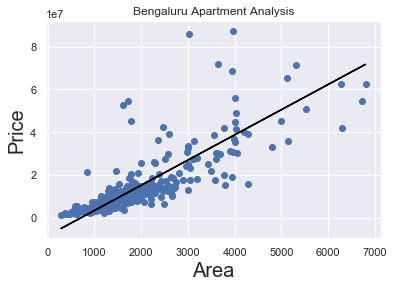

In [53]:
plt.scatter(x_test,y_test)
plt.title('Bengaluru Apartment Analysis')
plt.xlabel('Area',size=20)
plt.ylabel('Price',size=20)
plt.plot(x_test,reg.predict(x_test),color='black')
plt.show()

In [54]:
reg.score(x_train,y_train)

0.7486829871665215